# Yahoo Today Module

* Setup
```bash
$ git clone https://github.com/antonismand/Personalized-News-Recommendation.git
$ cd Personalized-News-Recommendation
```

* [Yahoo Webscope](https://webscope.sandbox.yahoo.com/catalog.php?datatype=i&did=67)
    * R6A - Yahoo! Front Page Today Module User Click Log Dataset, version 1.0 (1.1 GB)



<p align="center"><img src="https://user-images.githubusercontent.com/43728746/136052879-8da8e395-dcfa-47ab-b17c-7d08f8ce76dc.png" width="47%"></p>

# EDA

In [2]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
import gzip
import fileinput
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from collections import Counter

In [4]:
articles = []
features = []
events = []
timestamp = []
skipped = 0

output_file_name = './ydata-fp-td-clicks-v1_0.20090502.gz'
with gzip.open(output_file_name, "rb") as f:
    for line in f: # each line corresponds to a separate user visit
        cols = line.split()
        if (len(cols) - 10) % 7 != 0:
            skipped += 1 # erroneous data
        else:
            time = datetime.utcfromtimestamp(int(cols[0])).strftime('%Y-%m-%d %H:%M:%S')
            timestamp.append(time)
            pool_idx = []
            pool_ids = []
            for i in range(10, len(cols) - 6, 7):
                id = cols[i][1:]
                if id not in articles:
                    articles.append(id)
                    features.append([float(x[2:]) for x in cols[i + 1: i + 7]])
                pool_idx.append(articles.index(id))
                pool_ids.append(id)

            events.append(
                [
                    pool_ids.index(cols[1]),
                    int(cols[2]),
                    [float(x[2:]) for x in cols[4:10]],
                    pool_idx,
                ]
            )


## 1. Details

In [5]:
print('전체 article 수:', len(articles))
print('전체 event(방문 로그) 수:', len(events)) 

전체 article 수: 42
전체 event(방문 로그) 수: 3679695


In [6]:
visitor_cnt = Counter(timestamp) # every 300s, snapshots of user click behavior were taken

print('logging start:', min(list(visitor_cnt.keys())))
print('logging end:', max(list(visitor_cnt.keys())))
visitor_cnt

logging start: 2009-05-02 06:55:00
logging end: 2009-05-03 06:55:00


Counter({'2009-05-02 06:55:00': 1833,
         '2009-05-02 07:00:00': 7288,
         '2009-05-02 07:05:00': 7227,
         '2009-05-02 07:10:00': 7414,
         '2009-05-02 07:15:00': 6932,
         '2009-05-02 07:20:00': 6929,
         '2009-05-02 07:25:00': 6902,
         '2009-05-02 07:30:00': 6721,
         '2009-05-02 07:35:00': 6801,
         '2009-05-02 07:40:00': 6722,
         '2009-05-02 07:45:00': 6650,
         '2009-05-02 07:50:00': 6362,
         '2009-05-02 07:55:00': 6550,
         '2009-05-02 08:00:00': 6317,
         '2009-05-02 08:05:00': 6318,
         '2009-05-02 08:10:00': 6145,
         '2009-05-02 08:15:00': 6195,
         '2009-05-02 08:20:00': 6249,
         '2009-05-02 08:25:00': 5954,
         '2009-05-02 08:30:00': 5889,
         '2009-05-02 08:35:00': 5836,
         '2009-05-02 08:40:00': 5816,
         '2009-05-02 08:45:00': 5834,
         '2009-05-02 08:50:00': 5697,
         '2009-05-02 08:55:00': 5598,
         '2009-05-02 09:00:00': 5673,
         '20

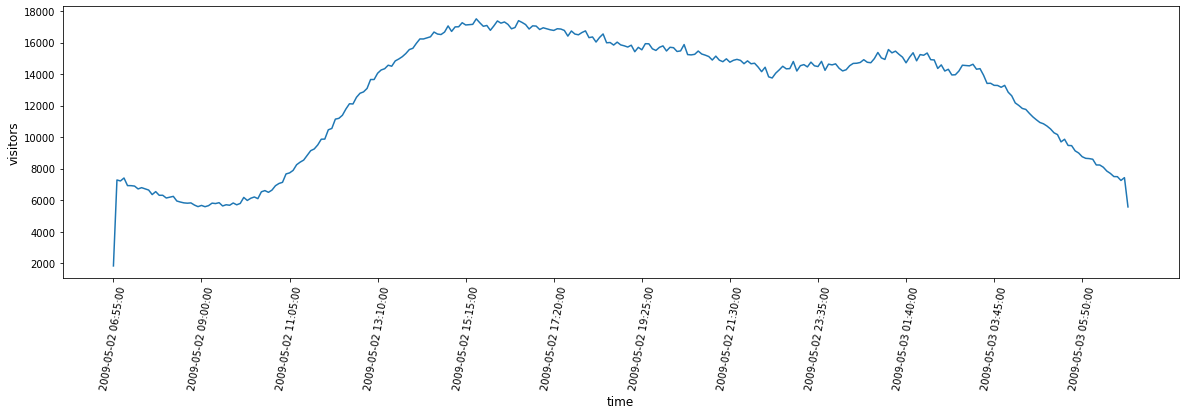

In [7]:
x, y = zip(*sorted(visitor_cnt.items()))
t = list(visitor_cnt.keys())

plt.figure(figsize = (20, 5))
plt.plot(x, y)
plt.xlabel('time', fontsize=12,)
plt.ylabel('visitors', fontsize=12,)
plt.xticks(np.arange(0, len(t), step=25), [t[i] for i in np.arange(0, len(t), step=25)], fontsize=10, rotation=80)
plt.show()

## 2. Data
* each line corresponds to a separate user visit
    * (1) timestamp
    * (2) article id at F1
    * (3) reward(user click feedback)
    * (4) user feature
    * (5) article pool(article feature)

In [8]:
line # ydata-fp-td-clicks-v1_0.20090502.gz 파일의 마지막 line 

b'1241333700 109536 0 |user 2:0.538953 3:0.100827 4:0.056202 5:0.301337 6:0.002680 1:1.000000 |109476 2:0.421669 3:0.000011 4:0.010902 5:0.309585 6:0.257833 1:1.000000 |109566 2:0.297322 3:0.000025 4:0.034951 5:0.413566 6:0.254137 1:1.000000 |109536 2:0.348058 3:0.000031 4:0.016792 5:0.411669 6:0.223450 1:1.000000 |109524 2:0.274868 3:0.000032 4:0.046639 5:0.362209 6:0.316252 1:1.000000 |109541 2:0.333922 3:0.000041 4:0.187718 5:0.234241 6:0.244077 1:1.000000 |109571 2:0.306008 3:0.000450 4:0.077048 5:0.230439 6:0.386055 1:1.000000 |109557 2:0.003949 3:0.000000 4:0.988976 5:0.000667 6:0.006408 1:1.000000 |109568 2:0.000031 3:0.999526 4:0.000024 5:0.000011 6:0.000407 1:1.000000 |109569 2:0.334872 3:0.000000 4:0.054332 5:0.452479 6:0.158317 1:1.000000 |109563 2:0.263181 3:0.000003 4:0.021798 5:0.498398 6:0.216621 1:1.000000 |109564 2:0.306008 3:0.000450 4:0.077048 5:0.230439 6:0.386055 1:1.000000 |109565 2:0.334151 3:0.000005 4:0.014330 5:0.483631 6:0.167883 1:1.000000 |109551 2:0.116434

In [9]:
cols = line.split()
cols

[b'1241333700',
 b'109536',
 b'0',
 b'|user',
 b'2:0.538953',
 b'3:0.100827',
 b'4:0.056202',
 b'5:0.301337',
 b'6:0.002680',
 b'1:1.000000',
 b'|109476',
 b'2:0.421669',
 b'3:0.000011',
 b'4:0.010902',
 b'5:0.309585',
 b'6:0.257833',
 b'1:1.000000',
 b'|109566',
 b'2:0.297322',
 b'3:0.000025',
 b'4:0.034951',
 b'5:0.413566',
 b'6:0.254137',
 b'1:1.000000',
 b'|109536',
 b'2:0.348058',
 b'3:0.000031',
 b'4:0.016792',
 b'5:0.411669',
 b'6:0.223450',
 b'1:1.000000',
 b'|109524',
 b'2:0.274868',
 b'3:0.000032',
 b'4:0.046639',
 b'5:0.362209',
 b'6:0.316252',
 b'1:1.000000',
 b'|109541',
 b'2:0.333922',
 b'3:0.000041',
 b'4:0.187718',
 b'5:0.234241',
 b'6:0.244077',
 b'1:1.000000',
 b'|109571',
 b'2:0.306008',
 b'3:0.000450',
 b'4:0.077048',
 b'5:0.230439',
 b'6:0.386055',
 b'1:1.000000',
 b'|109557',
 b'2:0.003949',
 b'3:0.000000',
 b'4:0.988976',
 b'5:0.000667',
 b'6:0.006408',
 b'1:1.000000',
 b'|109568',
 b'2:0.000031',
 b'3:0.999526',
 b'4:0.000024',
 b'5:0.000011',
 b'6:0.000407',
 b

#### (1) timestamp

In [10]:
time = int(cols[0])
datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')

'2009-05-03 06:55:00'

#### (2) article id at F1
* random policy 
    * the displayed article is chosen uniformly at random from the candidate article pool

In [11]:
article_id_at_f1 = cols[1]

article_pool = []
for i in range(10, len(cols) - 6, 7):
    article_id = cols[i][1:] 
    article_pool.append(article_id)

In [12]:
print(len(article_pool))
article_pool

19


[b'109476',
 b'109566',
 b'109536',
 b'109524',
 b'109541',
 b'109571',
 b'109557',
 b'109568',
 b'109569',
 b'109563',
 b'109564',
 b'109565',
 b'109551',
 b'109567',
 b'109553',
 b'109561',
 b'109560',
 b'109562',
 b'109542']

In [13]:
article_id_at_f1

b'109536'

In [14]:
# view count, click count, ctr for each article_id
article_view_cnt = {article_id:0 for article_id in articles}
article_click_cnt = {article_id:0 for article_id in articles}
for event in events:
    article_id = articles[event[0]]   
    article_view_cnt[article_id] += 1
    article_click_cnt[article_id] += event[1]  # reward 

article_click_cnt = dict(sorted(article_click_cnt.items(),key=lambda x:x[1], reverse=True))
for article_id in article_click_cnt.keys():
    if article_view_cnt[article_id] >0:
        view_cnt = article_view_cnt[article_id]
        click_cnt = article_click_cnt[article_id]
        ctr = round(click_cnt/view_cnt, 3)
        print(article_id, view_cnt, click_cnt, ctr) 

b'109525' 177879 6676 0.038
b'109547' 177418 6666 0.038
b'109524' 177581 6491 0.037
b'109417' 177072 6256 0.035
b'109534' 177060 6135 0.035
b'109510' 178224 5911 0.033
b'109542' 177032 5764 0.033
b'109529' 176314 5627 0.032
b'109544' 177890 5421 0.03
b'109552' 176119 5180 0.029
b'109546' 176915 5062 0.029
b'109550' 177014 4977 0.028
b'109530' 177719 4911 0.028
b'109553' 135429 4824 0.036
b'109531' 177155 4645 0.026
b'109545' 176523 4545 0.026
b'109536' 175263 4463 0.025
b'109548' 176896 4391 0.025
b'109533' 177196 4352 0.025
b'109543' 176638 4346 0.025
b'109551' 125996 4285 0.034
b'109554' 50193 1148 0.023
b'109555' 3500 108 0.031
b'109518' 669 16 0.024


#### (3) reward
* user click feedback
* every 300s, snapshots of user click behavior were taken

In [15]:
reward = int(cols[2])
reward

0

#### (4) user feature

In [16]:
user_feature = [float(x[2:]) for x in cols[4:10]]
user_feature

[0.538953, 0.100827, 0.056202, 0.301337, 0.00268, 1.0]

#### (5) article pool

In [17]:
for i in range(10, len(cols) - 6, 7):
    article_id = cols[i][1:]    
    article_feature = [float(x[2:]) for x in cols[i+1: i+7]]
    
    print(article_id)
    print(article_feature)
    print('\n')

b'109476'
[0.421669, 1.1e-05, 0.010902, 0.309585, 0.257833, 1.0]


b'109566'
[0.297322, 2.5e-05, 0.034951, 0.413566, 0.254137, 1.0]


b'109536'
[0.348058, 3.1e-05, 0.016792, 0.411669, 0.22345, 1.0]


b'109524'
[0.274868, 3.2e-05, 0.046639, 0.362209, 0.316252, 1.0]


b'109541'
[0.333922, 4.1e-05, 0.187718, 0.234241, 0.244077, 1.0]


b'109571'
[0.306008, 0.00045, 0.077048, 0.230439, 0.386055, 1.0]


b'109557'
[0.003949, 0.0, 0.988976, 0.000667, 0.006408, 1.0]


b'109568'
[3.1e-05, 0.999526, 2.4e-05, 1.1e-05, 0.000407, 1.0]


b'109569'
[0.334872, 0.0, 0.054332, 0.452479, 0.158317, 1.0]


b'109563'
[0.263181, 3e-06, 0.021798, 0.498398, 0.216621, 1.0]


b'109564'
[0.306008, 0.00045, 0.077048, 0.230439, 0.386055, 1.0]


b'109565'
[0.334151, 5e-06, 0.01433, 0.483631, 0.167883, 1.0]


b'109551'
[0.116434, 0.0, 0.611344, 0.077418, 0.194803, 1.0]


b'109567'
[0.362262, 4e-06, 0.174201, 0.267464, 0.196069, 1.0]


b'109553'
[0.358414, 8.2e-05, 0.056052, 0.309795, 0.275657, 1.0]


b'109561'
[0.0370

In [18]:
# all article pools 
total_article_pool = set(['_'.join((map(lambda x: str(x), sorted(e[-1])))) for e in events])

print('전체 article pool 개수:', len(total_article_pool))
total_article_pool

전체 article pool 개수: 37


{'0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18',
 '0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20',
 '0_1_2_3_4_5_6_7_8_9_10_11_12_13_15_16_17_18_19_20_21',
 '0_1_2_3_4_5_6_7_8_9_10_11_12_13_15_16_17_18_19_20_21_22',
 '0_2_3_4_5_6_7_8_9_10_11_12_13_15_16_17_18_19_20_21_22',
 '0_2_3_4_5_6_7_8_9_10_11_12_13_15_16_17_18_19_20_21_22_23_24',
 '0_2_4_5_6_8_10_11_12_13_15_16_17_18_19_20_21_22_23_24_25',
 '0_2_4_5_6_8_10_11_12_13_15_16_17_18_19_20_21_22_23_24_25_26',
 '0_2_4_5_6_8_10_11_13_15_16_17_18_19_20_21_22_23_24_25_26',
 '0_2_4_5_6_8_10_11_13_15_16_17_18_19_20_21_22_23_24_25_26_27',
 '0_2_4_5_6_8_9_10_11_12_13_15_16_17_18_19_20_21_22_23_24',
 '0_2_4_5_6_8_9_10_11_12_13_15_16_17_18_19_20_21_22_23_24_25',
 '0_4_5_6_8_10_11_13_15_16_17_18_19_20_21_22_23_24_25_26_27_28',
 '0_4_5_8_10_11_13_15_16_17_18_19_20_21_22_23_24_25_26_27_28',
 '0_4_5_8_10_11_13_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29',
 '0_4_5_8_10_11_13_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29_30',
 '0_5_10_13_15_16